<a href="https://colab.research.google.com/github/distinctkemi/Breast-Cancer-Prediction/blob/main/MA336_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __BREAST CANCER SURVIVAL PREDICTION USING MACHINE LEARNING__

##**Abstract**

One of the most prevalent malignancies with a high mortality rate among women is breast cancer. Breast cancer survival rates will rise from 56% to over 86 percent with an early diagnosis. Therefore, a precise and trustworthy approach is required for the early detection of this cancer. Although breast cancer can affect both men and women, it is much more common in women, so this study will concentrate on women. Breast cancer diagnosis and treatment have advanced thanks to significant investment for research and awareness campaigns. Medical professionals can reduce the number of incorrect decisions by using machine learning models.

This study's goal is to suggest a machine learning-based categorization strategy for predicting various breast cancer kinds' survival rates. We make use of a dataset with sixteen variables that contains the records of 334 patients, of which 330 (98.8%) were female and 4 (1.2%) were male, respectively. Prior to preprocessing, the data contains 16 features, of which 8 are categorical (e.g., patient’s gender, histology, tumour size) and 8 are numerical (e.g., patient’s age and tumor size). Numerical variables were scaled using … (e.g., min-max scaler); categorical variables were encoded using ... (e.g., binary encoding) . The number of variables used after these preprocessing steps was 12.

The proposed model for the prediction of breast cancer survival combined Logisitic Regression (LR), Random Forest Classifier (RFC),and Decision Tree classifier, confusion matrix and k-fold cross-validation were used as metrics to test these models. 

##**Introduction**

The second-most hazardous cancer is breast cancer, behind lung cancer, which is ranked as the most lethal. Nearly 25% of new instances of it are women, making up about 12% of all new cancer cases. When experiencing any cancer sign or symptom, people contact an oncologist. Through mammograms, breast MRIs, ultrasound breast X-rays, tissue biopsies, and other methods, oncologists can identify and diagnose breast cancer. Once breast cancer has been identified, the patient undergoes routine sentinel node biopsy, which aids in the identification of malignant cells in lymph nodes. The classification of benign and malignant cancers also uses machine learning methods.[[1](https://philpapers.org/rec/SHABCD-3)]. Breast cancer is a condition in which the breast's cells proliferate out of control and it comes in several forms. The type of breast cancer is determined by which breast cells develop into cancer.

In cancer research, healthcare is geared at early cancer detection and the provision of preventive measures to enhance a person's health. In the medical field, researchers and data scientists are collaborating on healthcare for early detection and prevention of one of the deadly diseases like breast cancer. One of the most prevalent types of cancer is breast cancer. Due of its potentially fatal repercussions, it has attracted a lot of attention. There are about a hundred different forms of cancer in the human body, including breast, prostate, ovarian, liver, and bladder cancers, according to the National Cancer Institute (NCI) [[2](https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/iet-syb.2019.0087)].

Breast cancer symptoms and signs might include: 
- A change in the size, shape, or appearance of a breast
- A lump or thickening in the breast that feels different from the surrounding tissue 
- Dimpling or other changes to the skin above the breasts 
- A newly inverted nipple - The pigmented region of skin around the nipple (areola) or breast skin peeling, scaling, crusting, or flaking.
- Orange-skin-like redness or pitting of the skin over your breast

###**Dataset**

Dataset used for this project was gotten from kaggle [here](https://www.kaggle.com/datasets/amandam1/breastcancerdataset)

| Attributes       |Description             |
|------------------|-------------------------|
|   Age         | Age at diagnosis (Years)          |
|Gender           | Gender of the patient                  |
Protein1, Protein2, Protein3, Protein4   |  Expression levels                    |
|Tumour_Stage    |  Breast cancer stage of the patient |
|Histology       |  Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma   |
|ER (Estrogen receptor) status        | Positive/ Negative   |
|PR (Progesterone Receptor) Status        | Positive/Negative |
|HER2 (human epidermal growth factor receptor 2)     | Positive/Negative  |
|Surgery_Type   | Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other      |
|Date_of_surgery | Date on which surgery was performed (in DD-MM-YY) |
|DateofLast_Visit        | Date of last visit (in DD-MM-YY) [can be null, in case the patient didn’t visited again after the surgery]|
|Patient_status  | Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].  |

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("Breast Cancer Prediction.csv")
data.head()


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
#Getting the size of the data set
print('The dataset contains' , data.shape[0] , 'number of rows and', data.shape[1], 'number of columns')

The dataset contains 334 number of rows and 16 number of columns


In [ ]:
# Print out information about the dataframe to know the type of data of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

Given that the dataset contains 11 categorical characteristics and 4 continuous/numerical features, the code above indicates that there are more categorical features than continuous/numerical features.

In [ ]:
#Number of unique values in the data to weigh the ratio of categorical features to numerical/continous features
data.nunique().sort_values(ascending=True)

ER status               1
PR status               1
Gender                  2
HER2 status             2
Patient_Status          2
Tumour_Stage            3
Histology               3
Surgery_type            4
Age                    57
Date_of_Surgery       181
Date_of_Last_Visit    285
Protein1              333
Protein4              333
Patient_ID            334
Protein2              334
Protein3              334
dtype: int64

The above code shows that there are 8 categorical column, which include (['ER status', 'PR status', ''Gender', 'HER2 status', 'Patient status', 'Tumour_Stage', 'Histology', 'Surgery_type', ]) while the rest of the features are numerical/continuous features

#**Exploratory Data Analysis (EDA)**

**DATA PRE-PROCESSING**

In [ ]:
#Checking for missing values
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

The above code shows that in the dataset, just two columns;"Date of last Visit" and "Patient Status" have missing values.

In [ ]:
#Checking the gender ratio  
data.Gender.value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

The gender column shows that there are more women than men, as would be expected for breast cancer cases. Therfore, we would be using the data for the females only.

In [ ]:
#Checking for duplicate data
data.duplicated().sum()

0

The code above demonstrates that the data set is duplicate-free, indicating that each row and item in the dataset has unique values.

**Handling missing values, selecting data for only females and dropping irrelevant columns**

In [ ]:
#Dropping the missing values because only two columns has missing values, date of last visit has the highest number of missing values and
# is somewhat irrelevant in predicting if a patient would survive a breast cancer or not, therefore it is save to drop the column
new_df=data.dropna()

#Extracting the data for only females
new_df = new_df[new_df.Gender=='FEMALE']

#Dropping some columns because there are insignificant and will not be needed in our model
new_df.drop(['Patient_ID','Date_of_Surgery','Date_of_Last_Visit','Gender'],axis=1,inplace=True)

In [ ]:
#checking the size of the data after dropping the rows with missing values and selecting only data for females
new_df.shape

(313, 12)

In [ ]:
#Confirming that there are no missing values in the dataset again
new_df.isnull().sum()

Age               0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [ ]:
#Count for the class in the target column
class0, class1 = new_df['Patient_Status'].value_counts()

# Dividing by class
df_class0 = new_df[new_df['Patient_Status'] == 'Alive']
df_class1 = new_df[new_df['Patient_Status'] == 'Dead']

print('Count for Alive ', class0)
print('Count for Dead ',class1)

Count for Alive  252
Count for Dead  61


The aforementioned code demonstrate that there were 61 breast cancer fatalities and 252 breast cancer survivors in the dataset.

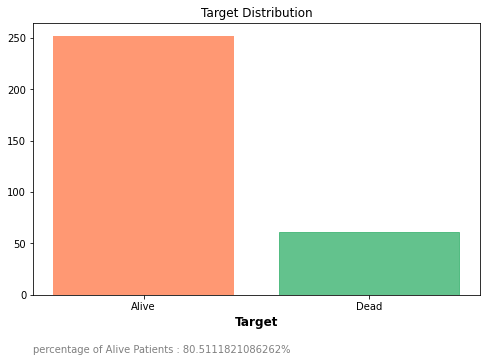

In [ ]:
#Visualising the target column
target = new_df['Patient_Status'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target.index, target, color = 'coral', alpha = 0.8)
barplot[1].set_color('mediumseagreen')

ax.set_title('Target Distribution')
percentage = new_df['Patient_Status'].value_counts(normalize=True)[0]*100
ax.annotate("percentage of Alive Patients : {}%".format(percentage),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target column', fontsize = 12, weight = 'bold')
plt.show()

Because the target column is unbalanced according to the plot above, resampling the data is necessary to address this problem.

In [ ]:
#Percentage Ratio of the target column(Patient_Status)
round(new_df.Patient_Status.value_counts()*100/len(data),2)


Alive    75.45
Dead     18.26
Name: Patient_Status, dtype: float64

We have over 75 percent of the patient who survived the breast cancer and less than 20 percent of the patient who died of breast cancer in the dataset

In [ ]:
#Let's calculate the probability of surviving without using any feature information:
live_die = sum(data.Patient_Status) / len(data)
print('Probability of surviving is:', np.round(live_die,2))

Probability of surviving is: 0.8


Visualisation of the categorical columns

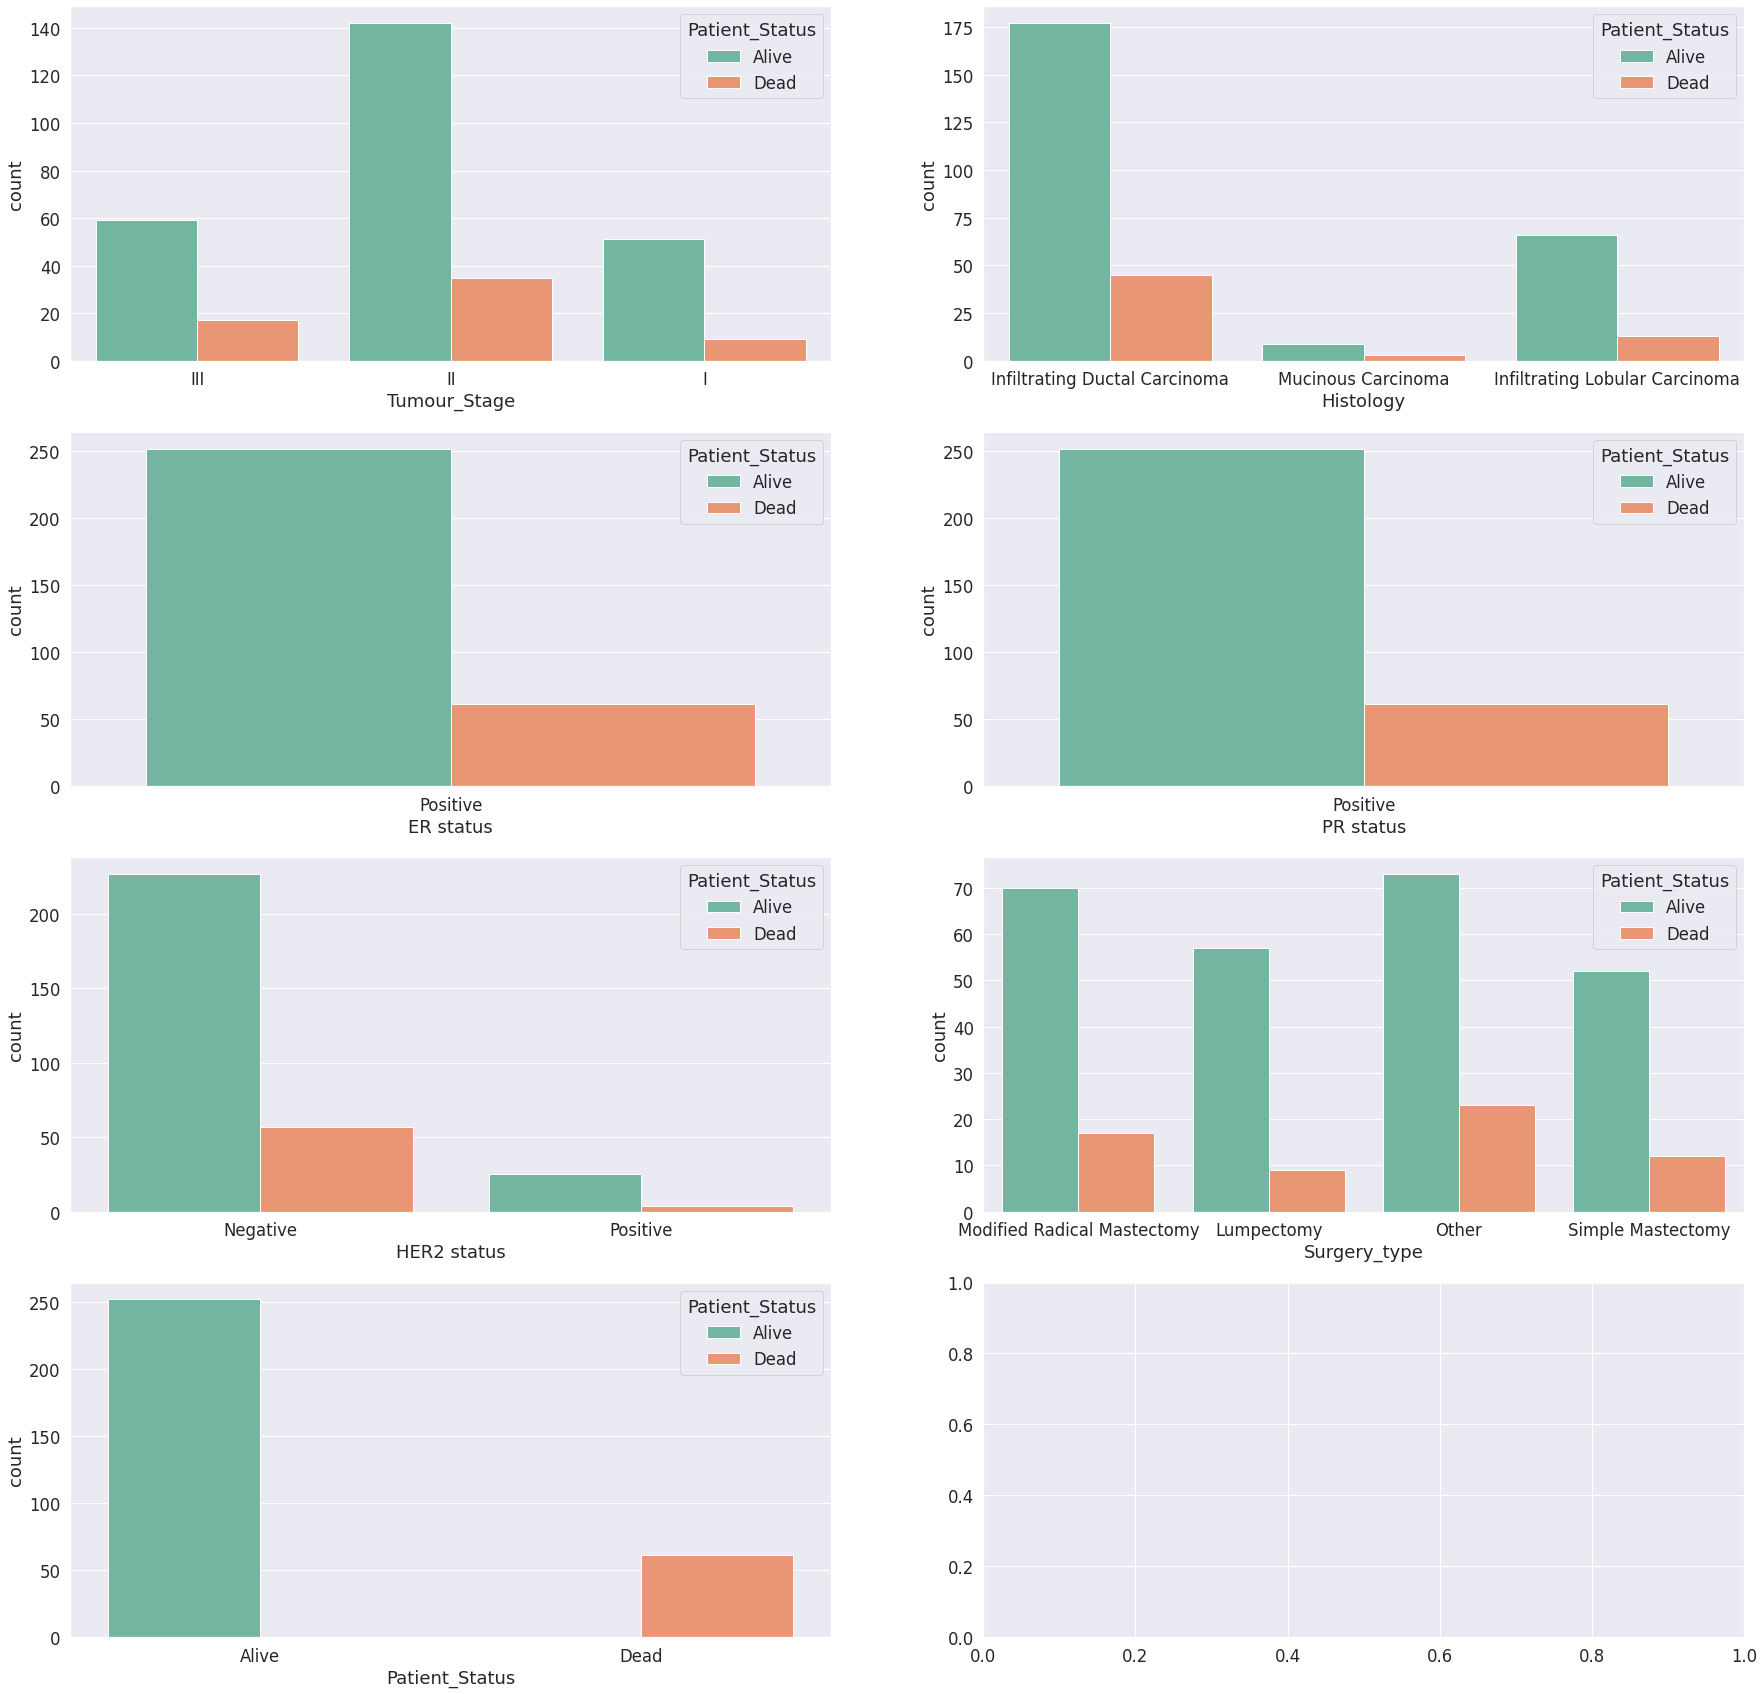

In [ ]:

fig, ax = plt.subplots(4,2, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in new_df.select_dtypes('object'): 
    sns.countplot(new_df[col], hue=new_df['Patient_Status'], ax=ax[i//2][i%2], palette='Set2')
    i=i+1
plt.show()



The visualisation of category columns reveals that a greater proportion of patients had stage II tumours, with high chances of surviving a breast cancer and infiltrating ductal carcinomas in terms of histology also has high number of cancer survival. This can be visualised further below:


In [ ]:
# Tumour Stage
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values
countIII, countII, countI = df['Tumour_Stage'].unique()
labels = [countI, countII, countIII]

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5,
             color=labels,
             color_discrete_map={'countIII':'gold',
                                 'countII':'cyan',
                                 'countIII':'mediumseagreen'},
             title="Tumour Stages of Patients")
figure.show()

In [ ]:
data['Tumour_Stage'].value_counts()

2    180
3     77
1     60
Name: Tumour_Stage, dtype: int64

In [ ]:
# Histology
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values
IDC, ILC, MC = df['Histology'].unique()
labels = [IDC, ILC, MC]
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5,
             color=labels,
             color_discrete_map={'IDC':'gold',
                                 'ILC':'coral',
                                 'MC':'mediumseagreen'},

             title="Histology of Patients")
figure.show()

Visualisation of the numerical columns

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(new_df,
    dimensions= ['Age','Protein1','Protein2','Protein3','Protein4'],
    color = 'Patient_Status',color_continuous_scale= px.colors.sequential.Burg,template='ggplot2')
fig.update_layout(
    title='Relationship between features with respect to patient status',
    width=900,
    height=900,
)

fig.show()

The above plot shows that there is no linear relationship between the features

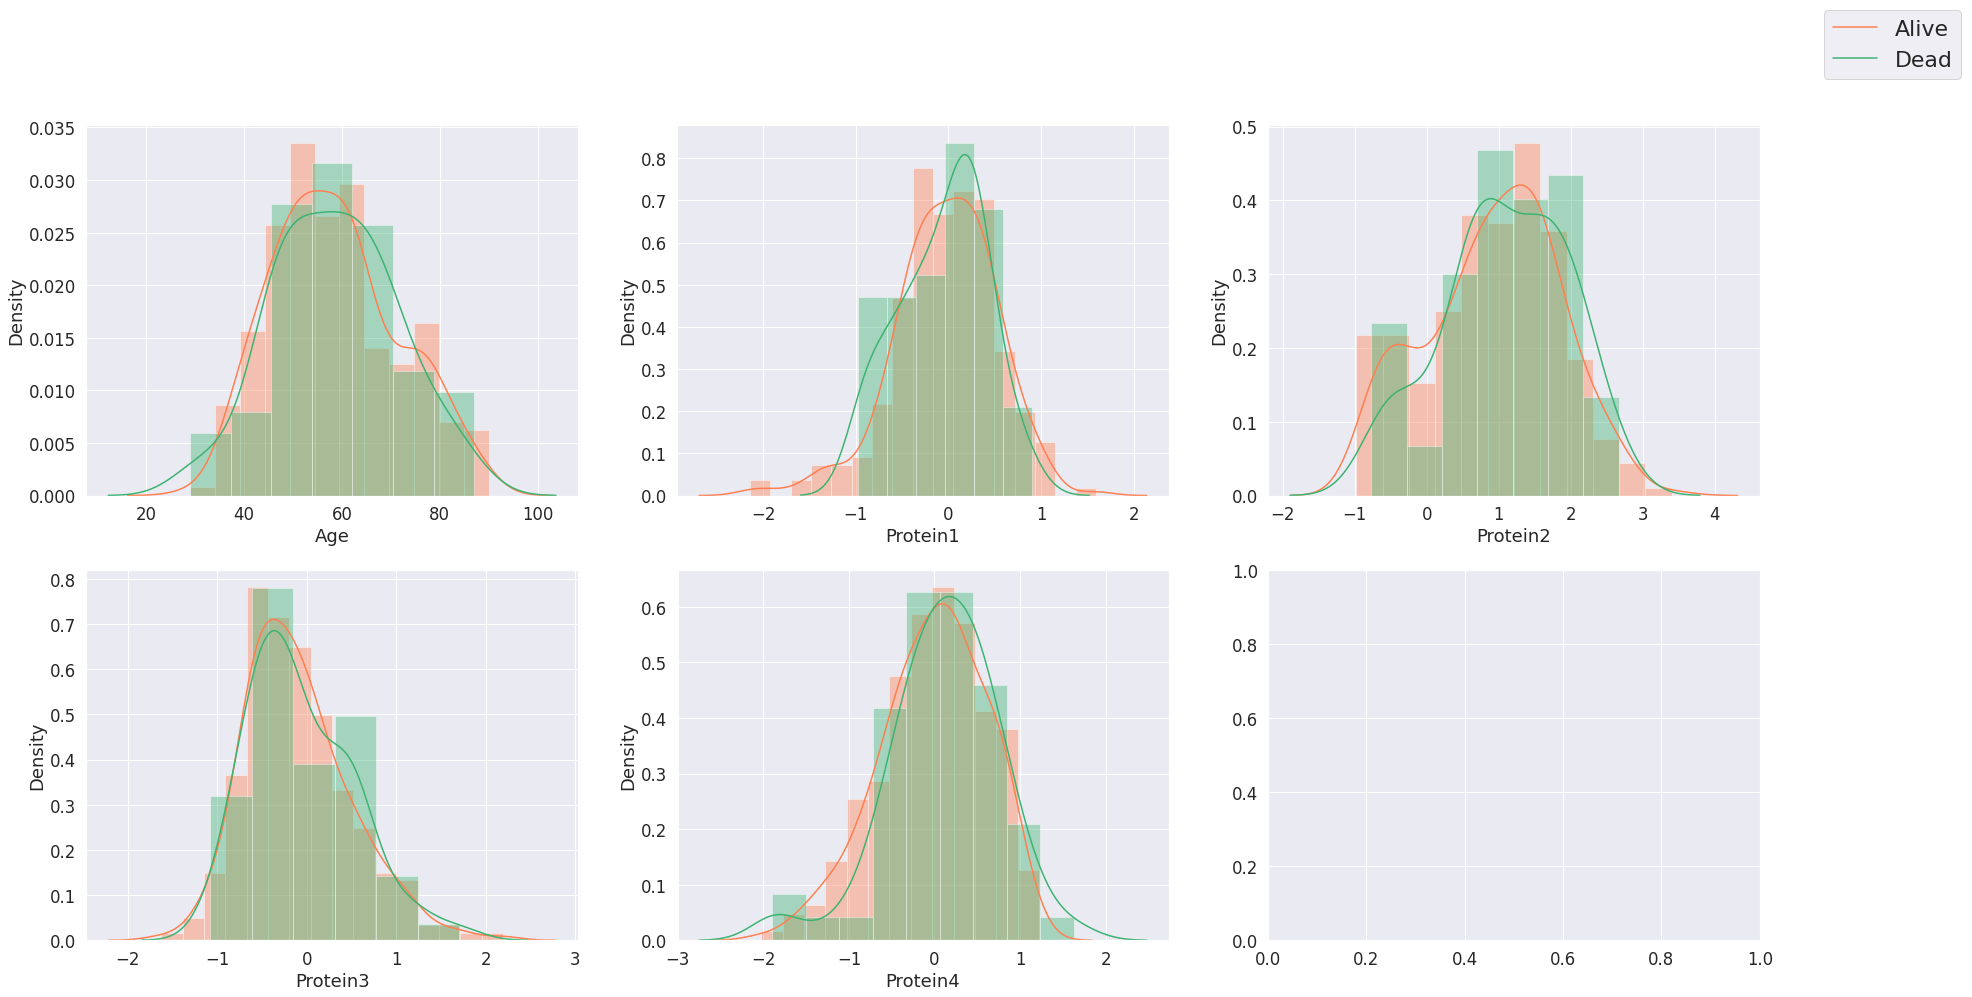

In [ ]:
Alive_df = df[df['Patient_Status']=="Alive"]
Dead_df = df[df['Patient_Status']=="Dead"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in df.select_dtypes(include=['float64','int64']):
    sns.distplot(Alive_df[col],label='Alive',ax=ax[i//3][i%3], color='coral')
    sns.distplot(Dead_df[col],label='Dead',ax=ax[i//3][i%3], color = 'mediumseagreen')
    i=i+1
fig.legend(labels=['Alive','Dead'],fontsize='22')
fig.show()

The above plot shows that the numerical columns are normally distributed with very slight skewness .

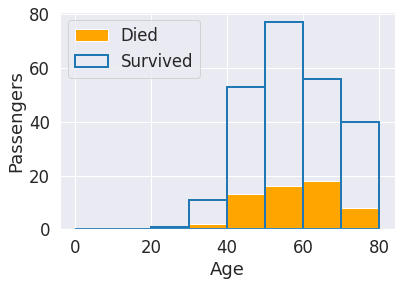

In [ ]:
# Use the same bins for both plots
bins_age = [0,10,20,30,40,50,60,70,80]

fig, ax = plt.subplots(1, 1)
ax.hist(new_df.loc[new_df['Patient_Status']==0].Age,bins=bins_age,color='orange',label='Died')
ax.hist(new_df.loc[new_df['Patient_Status']==1].Age,bins=bins_age,facecolor='none',edgecolor='tab:blue',linewidth=2,label='Survived')
ax.set_xlabel('Age')
ax.set_ylabel('Passengers')
ax.legend()
plt.show()

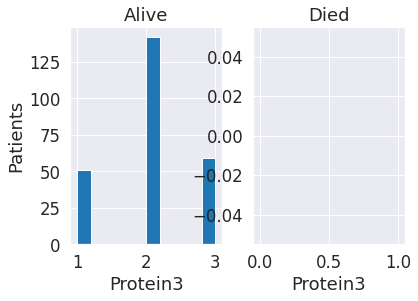

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df.loc[df['Patient_Status']==1].Tumour_Stage,color='tab:blue')
ax1.set_xlabel('Protein3')
ax1.set_ylabel('Patients')
ax1.set_title('Alive')
ax2.hist(df.loc[df['Protein3']==0].Tumour_Stage,color='orange')
ax2.set_xlabel('Protein3')
ax2.set_title('Died')
plt.show()

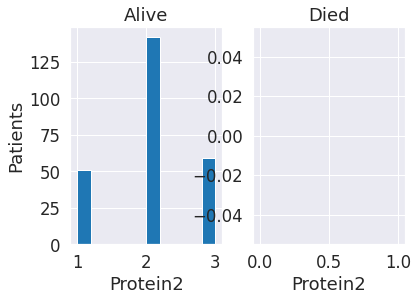

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df.loc[df['Patient_Status']==1].Tumour_Stage,color='tab:blue')
ax1.set_xlabel('Protein2')
ax1.set_ylabel('Patients')
ax1.set_title('Alive')
ax2.hist(df.loc[df['Protein2']==0].Tumour_Stage,color='orange')
ax2.set_xlabel('Protein2')
ax2.set_title('Died')
plt.show()

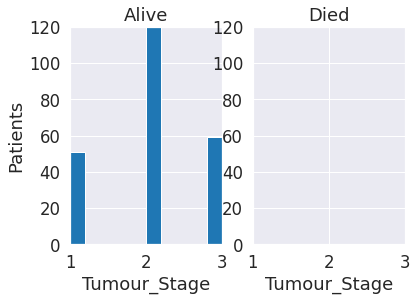

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df.loc[df['Patient_Status']==1].Tumour_Stage,color='tab:blue')
ax1.set_xlabel('Tumour_Stage')
ax1.set_ylabel('Patients')
ax1.set_title('Alive')
ax2.hist(df.loc[df['Tumour_Stage']==0].Tumour_Stage,color='orange')
ax2.set_xlabel('Tumour_Stage')
ax2.set_title('Died')
# Set the axis limits to be the same for both both plots
xlimits = [min(df.Tumour_Stage), max(df.Tumour_Stage)]
ylimits = [0, 120]
ax1.set_xlim(xlimits)
ax1.set_ylim(ylimits)
ax2.set_xlim(xlimits)
ax2.set_ylim(ylimits)
plt.show()

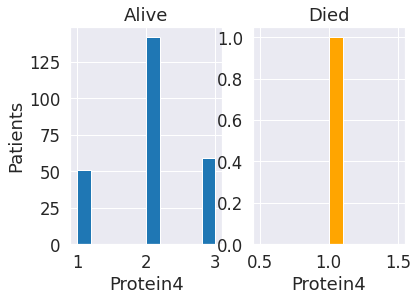

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df.loc[df['Patient_Status']==1].Tumour_Stage,color='tab:blue')
ax1.set_xlabel('Protein4')
ax1.set_ylabel('Patients')
ax1.set_title('Alive')
ax2.hist(df.loc[df['Protein4']==0].Tumour_Stage,color='orange')
ax2.set_xlabel('Protein4')
ax2.set_title('Died')
plt.show()

**FEATURE ENGINEERING**

In [ ]:
#This a function to convert the categorical features to numerical features
def encoding(df):
  code = {'FEMALE':0,
            'MALE':1,
            'III':3,
            'II':2,
            'I':1,
            'Infiltrating Ductal Carcinoma':0,
            'Mucinous Carcinoma':1,
            'Infiltrating Lobular Carcinoma':2,
            'Negative':0,
            'Positive':1,
            'Modified Radical Mastectomy':0,
            'Lumpectomy':1,
            'Simple Mastectomy':2,
            'Other':3,
            'Alive':1,
            'Dead':0
           }
  for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
  return df
    

In [ ]:
df = encoding(new_df)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36,0.080353,0.42638,0.54715,0.273680,3,0,1,1,0,0,1
1,43,-0.420320,0.57807,0.61447,-0.031505,2,1,1,1,0,1,0
2,69,0.213980,1.31140,-0.32747,-0.234260,3,0,1,1,0,3,1
3,56,0.345090,-0.21147,-0.19304,0.124270,2,0,1,1,0,0,1
4,56,0.221550,1.90680,0.52045,-0.311990,2,0,1,1,0,3,0


In [ ]:
# Correlations
correlations = df.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'like'
correlations['Patient_Status'].sort_values(ascending=False)

Patient_Status    1.000000
HER2 status       0.045948
Histology         0.038398
Protein1          0.022793
Age               0.001833
Protein3         -0.026967
Surgery_type     -0.054624
Tumour_Stage     -0.059914
Protein2         -0.074125
Protein4         -0.079410
ER status              NaN
PR status              NaN
Name: Patient_Status, dtype: float64

After examining the correlation between the features, it was found, as is depicted above, that the ER status and PR status produced nan values. This is because the two columns each contained a single value (1) across the entire data set, rendering them irrelevant and ineligible for inclusion in the model.
[Nan Correlation](https://www.kaggle.com/general/186524)

In [ ]:
df['PR status'].unique()

array([1])

In [ ]:
df['ER status'].unique()

array([1])

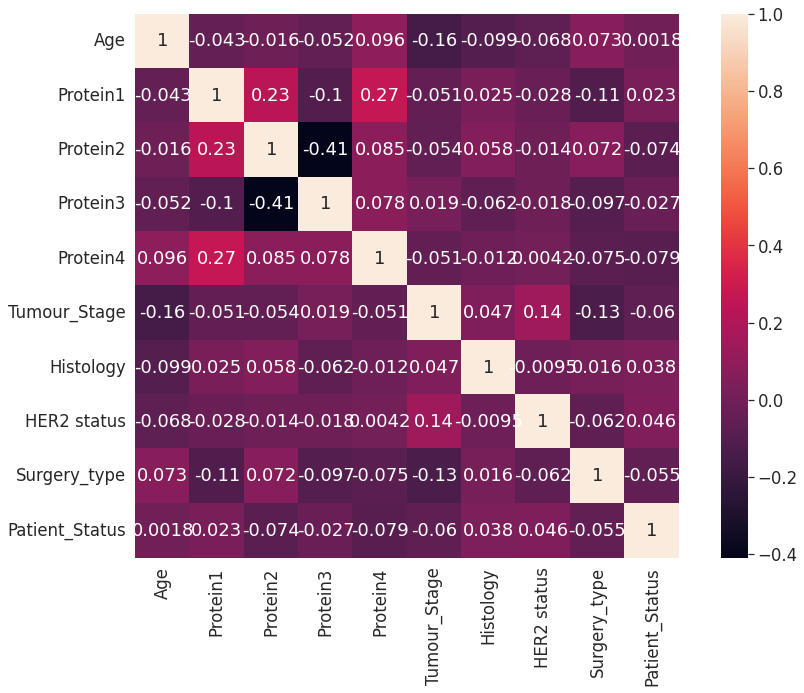

In [ ]:
#Heatmap of the features
b = df.drop(['ER status', 'PR status'], axis = 1)
plt.figure(figsize=(15,10))
foo = sns.heatmap(a.corr(), vmax=1, square=True, annot=True)

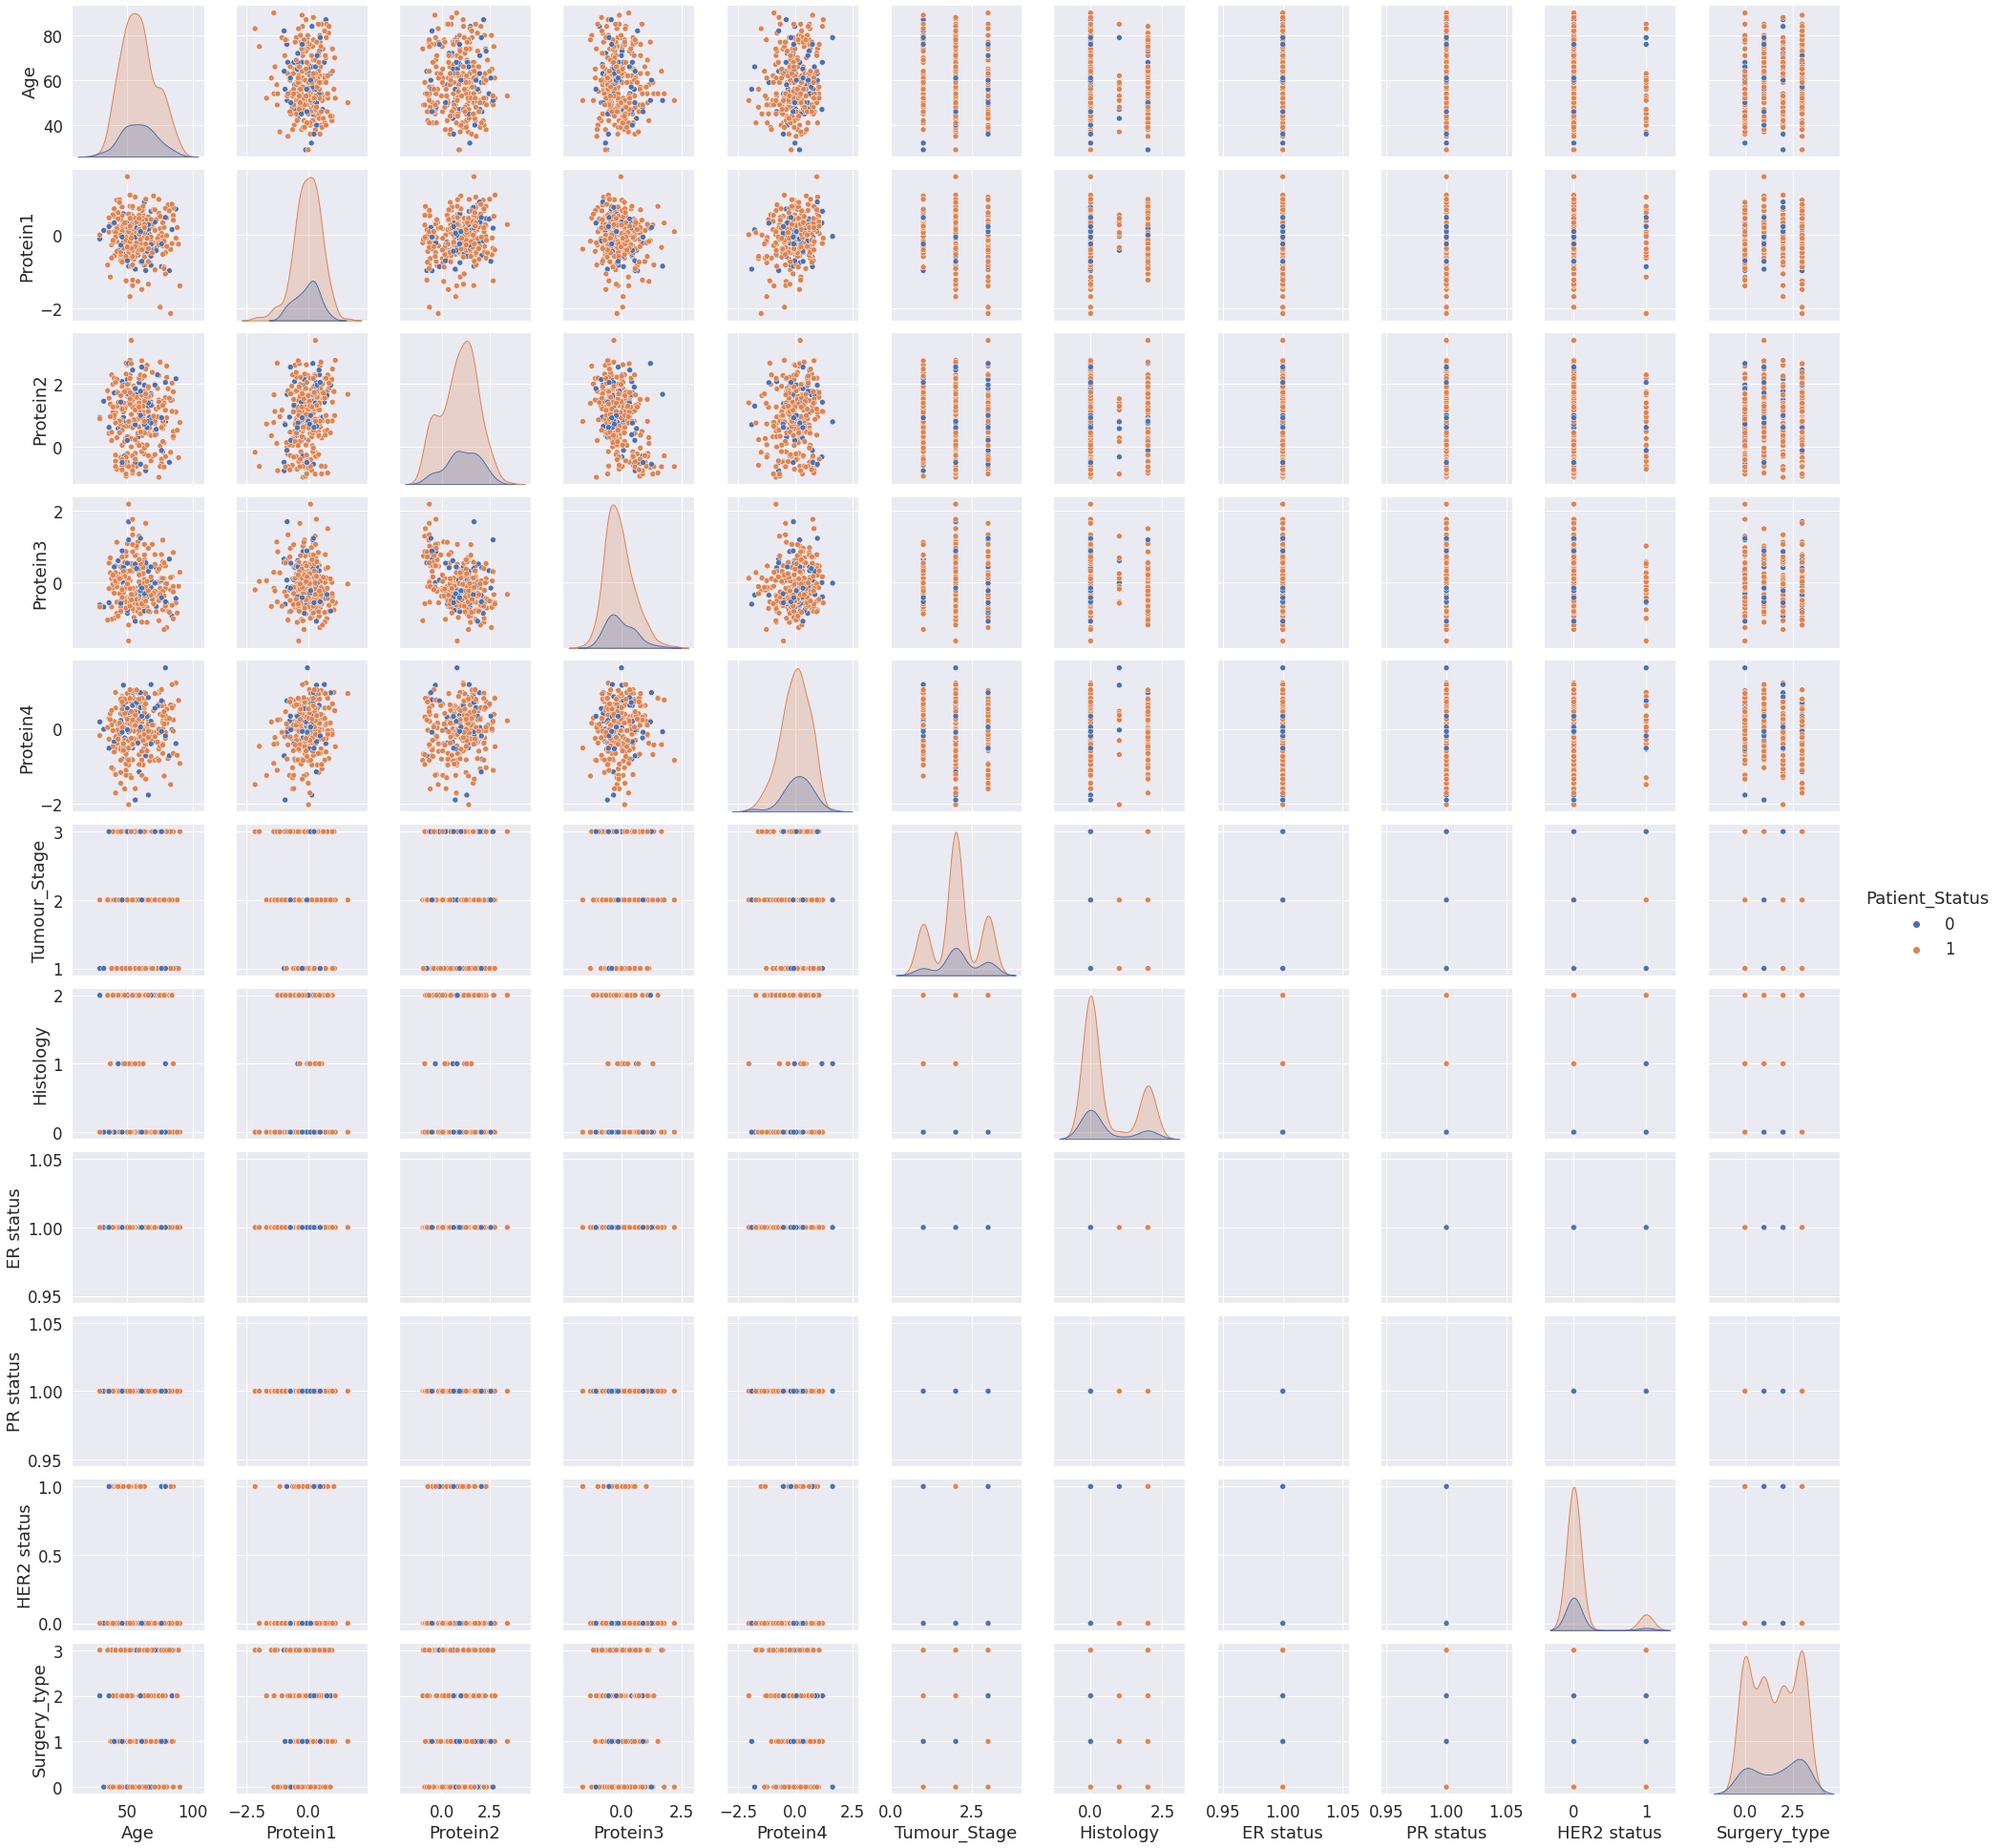

In [ ]:
# Scatterplots
import seaborn as sns
plot1 = sns.pairplot(df, hue = 'Patient_Status')
# An equivalent plot can be done with pandas:
#_ = pd.plotting.scatter_matrix(df[features], figsize=(12, 8))

In [ ]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.0,313.0,313.000000,313.000000,313.000000
mean,58.686901,-0.037034,0.949515,-0.093966,0.007715,2.051118,0.543131,1.0,1.0,0.092652,1.539936,0.805112
std,12.784370,0.536683,0.910090,0.592012,0.629162,0.658237,0.869106,0.0,0.0,0.290408,1.192593,0.396749
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500,1.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000
25%,49.000000,-0.361650,0.359950,-0.531360,-0.384790,2.000000,0.000000,1.0,1.0,0.000000,0.000000,1.000000
50%,58.000000,0.003977,0.997130,-0.193040,0.038522,2.000000,0.000000,1.0,1.0,0.000000,2.000000,1.000000
75%,67.000000,0.330920,1.612000,0.275630,0.458740,2.000000,2.000000,1.0,1.0,0.000000,3.000000,1.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,3.000000,2.000000,1.0,1.0,1.000000,3.000000,1.000000


In [ ]:
#Extracting features and target from the dataset after encoding the categorical features
X = df.drop('Patient_Status',axis=1)
y = df['Patient_Status']

##**Methodology**:





*  **Proposed Model**
After deep exploratory data analysis, it is discovered that the models suitable  for this type of dataset are Logistic regression, decision tree classifier and KNN


1.   Logistic Regression: Logistic regression is also referred to as binomial logistic regression or binary logistic regression because it is used to predict predict a binary outcome (1/0, Yes/No, True/False, Alive/Dead). LR is a subset of regression analysis, a predictive modelling techique used in finding the association between a dependent variable and one or more independent variables. Due to the insights gained from the data, it is clear from the dataset exploration that the dataset is suited for a logistic regression. It demonstrates that the features are all independent variables from the correlation, and the target (patient status) is the dependent variable, which is a binary result (Alive/Dead).

2.   Decision Tree Classifier: is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In decision tree classifier, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the decision tree classifier model predicts P(Y=1) as a function of X.



* **Metrics for Models**


**1.  Confusion Matrix**: The most widely used method for measuring logistic regression is the confusion matrix. It is also one of the simplest and most understandable metrics for determining the correctness of a classification model, where the output can be divided into two or more categories. This metric will be used for the logistic regression model and random forest classifier

>> **True Positive**: True positive is nothing but the case where the actual value, as well as the predicted value, are true. In this report, a true positive would mean the patient died of the cancer, and the model also predicted that the patient died of the cancer.

>>**False Negative**: In false negative, the actual value is true, but the predicted value is false. In this case a false negative would mean that that the patient died of cancer, but the model predicted that the patient survived the cancer.

>> **False Positive**:This is the case where the predicted value is true, but the actual value is false. Here, the model the false positive would mean that the patient survived the cancer, but, the patient did not survive the cancer. 

>> **True Negative**: This is the case where the actual value is false and the predicted value is also false.  In other words, the patient did not survive the cancer and our model predicted that the patient did not survive cancer.



**2.   k-fold cross-validation:** This is a resampling technique used to assess machine learning models on a small data sample. The process contains a single parameter, k, that designates how many groups should be created from a given data sample. As a result, the process is frequently referred to as k-fold cross-validation.This metric will be used for the decision tree classifier.






 








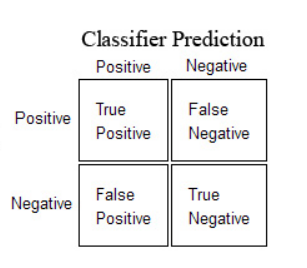

###**Model**

**Decision Tree Classifier**

In [ ]:
# Now run the ML decision tree algorithm

# Begin by separating into training and test datasets so we can test our algorithm's performance
Features = df.columns.tolist()
X_names = Features[1:] # Remove 'Survived' from feature names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)  

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) # Choose tree depth
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_test, y_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)  
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)
    

Accuracy on test set: 0.78
Features in order of importance:
Protein2
Protein4
Tumour_Stage
Protein3
Protein1
Histology
ER status
PR status
HER2 status
Surgery_type
Patient_Status


Decision tree visualisation

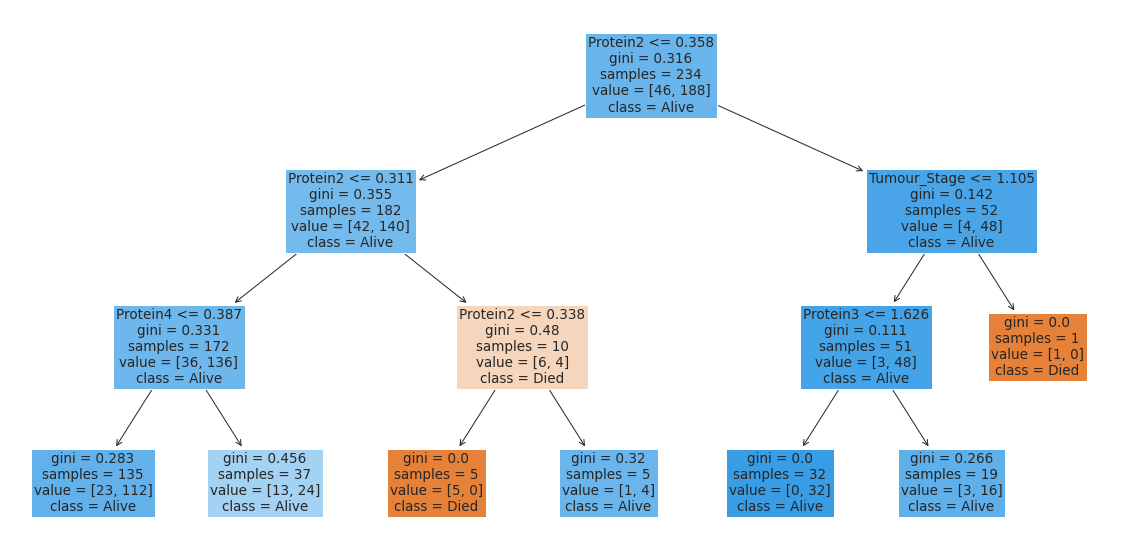

In [ ]:
y_names=['Died','Alive'] # Target labels
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True) # _ stops annotations print-out

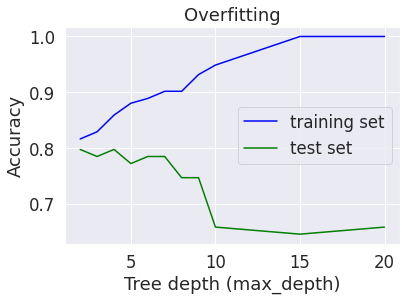

In [ ]:
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,color='blue',label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,color='green',label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Using 5-fold cross-validation to compute the mean accuracy at a tree depth of 1
import math
from sklearn.model_selection import cross_val_score
maxDepth = 1
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.81 0.81 0.78 0.81 0.81]
Average performance for a tree depth of 1 is: 80.2 +/- 1.4 %


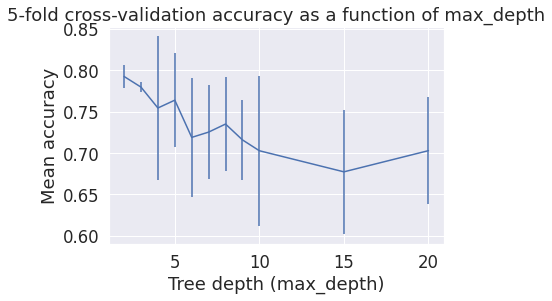

In [ ]:
# Plotting mean accuracy (found using the sklearn cross_val_score() class) as a function of max_depth.
from sklearn.model_selection import cross_val_score
import math
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
mean_accuracy_cv = [] # mean accuracy over the k folds for each tree depth
sd_cv = [] # standard deviation of accuracy scores over the k folds for each tree depth
k=5
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv.append(avg)
    sd_cv.append(sd)
    
# Make the plot
import matplotlib.pyplot as plt
fig = plt.figure()
plt.errorbar(max_depth_vals,mean_accuracy_cv,yerr=sd_cv)
plt.title(str(k)+"-fold cross-validation accuracy as a function of max_depth")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Mean accuracy")
plt.show()

The accuracy on the test set peaks at a depth of around 4-5


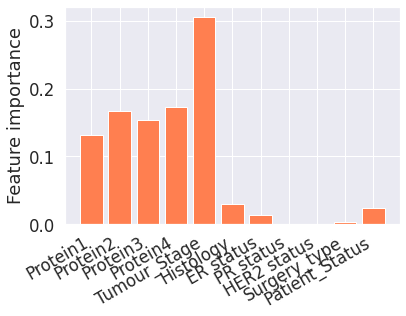

In [ ]:
#A barchat of feature importances using a fixed tree depth

def get_feature_importances(X,y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, 
                                                                        random_state=randomState, stratify=y)  
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_train,y_train)
    return decision_tree.feature_importances_

maxDepth = 4

import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,y,randomState,maxDepth)
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_names, feature_importances_mean,color='coral')
ax.set_ylabel('Feature importance') 
plt.xticks(rotation=30, ha='right')  
plt.show()

**Random Forest Classifier**

Accuracy is:  79.54545454545455
                precision    recall  f1-score   support

 Dead(Class 0)       0.00      0.00      0.00        18
Alive(Class 1)       0.80      1.00      0.89        70

      accuracy                           0.80        88
     macro avg       0.40      0.50      0.44        88
  weighted avg       0.63      0.80      0.70        88



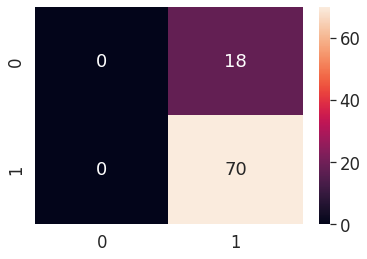

In [ ]:
from sklearn.metrics import classification_report

# split data train 72% and test 28%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)
clr = clr_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))*100
print('Accuracy is: ',ac)
print(classification_report(y_test,clr, 
                            target_names = ['Dead(Class 0)','Alive(Class 1)']))
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

The random forest classifier model above gave an accuracy of 80%. On the vertical axis of the matrix represents the actual axis and the horizontal represents the predicted axis. '0' equals Negative and '1' equals positive. Hence,

00- True Negative = 70

01- False Positive = 0

10- False Negative = 18

11- True Positive = 0

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        64

    accuracy                           0.81        79
   macro avg       0.41      0.50      0.45        79
weighted avg       0.66      0.81      0.73        79

Accuracy Score of Logistic Regression:  0.810126582278481


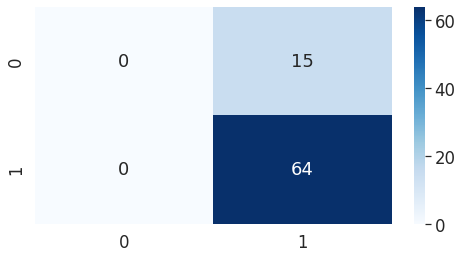

In [ ]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction
print(classification_report(y_test, y_pred)) #print classification report
LR_SC = accuracy_score(y_pred,y_test)
print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, y_pred)) #print accuracy score
matrix4=confusion_matrix(y_test, y_pred) #confusion matrix
plt.figure(figsize = (8,4))
sns.heatmap(matrix4 , annot = True, cmap="Blues") #visualise confusion matrix

The logistic regression model above gave an accuracy of 81%. On the vertical axis of the matrix represents the actual axis and the horizontal represents the predicted axis. '0' equals Negative and '1' equals positive. Hence,

00- True Negative = 64

01- False Positive = 0

10- False Negative = 15

11- True Positive = 0

As a result, the majority of patients are in stage two. Let's now examine the histology of people with breast cancer. (Histology is a description of a tumour based on the abnormality of the cancer cells and tissue under a microscope and the rate of growth and spread of cancer):

A general function to test for accuracy of different models

In [ ]:
def model_function(name,kernel=''):
    if name =='Logisitic Regression':
        model = LogisticRegression()
    elif name =='Decision Tree':
        model = DecisionTreeClassifier()
    elif name =='Random Forest':
        model = RandomForestClassifier()
    elif name == 'Naive Bayes':
        model = GaussianNB()
    elif name == 'KNN':
        model = KNeighborsClassifier()
    elif name =='SVM':
        if kernel == 'Linear':
            model = SVC(kernel='linear')
        if kernel == 'RBF':
            model = SVC(kernel='rbf')
        if kernel == 'Sigmoid':
            model = SVC(kernel='sigmoid')
            
    # Prediction Scores
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    return score

In [ ]:
models = ['Logistic regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM-Linear','SVM-RBF']
accuracy_data = pd.DataFrame(models)

    
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
scores = []
scores.append(model_function('Logisitic Regression'))
scores.append(model_function('Decision Tree'))  
scores.append(model_function('Random Forest'))
scores.append(model_function('Naive Bayes'))
scores.append(model_function('KNN'))
scores.append(model_function('SVM','Linear'))
scores.append(model_function('SVM','RBF'))


scores = pd.Series(scores)


In [ ]:
scores.index = models
accuracy = scores.to_frame()
accuracy

,0
Logistic regression,0.761905
Decision Tree,0.634921
Random Forest,0.761905
Naive Bayes,0.761905
KNN,0.746032
SVM-Linear,0.761905
SVM-RBF,0.761905


##**Conclusion**

In this experiment, three models were chosen to predict a patient's prognosis for breast cancer based on their medical history. It was also shown that logistic regression is the best model for this type of dataset because it provides an accuracy of 81 percent.

Following thorough preprocessing and the appropriate model selection, it was discovered that the top three features in the dataset are **Protein2, Protein4, and Tumour Stage**. This means that a patient has a very high chance of surviving breast cancer if they have a high amount of protein2 and protein 4, and if they are in the second stage of the tumour stage.

##**References**




1.   [Lab 3 worksheet](hhttps://colab.research.google.com/github/mariogutierrezroig/Teaching-Notebooks/blob/main/Decision_Trees/decision_trees_titanic.ipynb) from MA336 module by Dr Mario Gutierrez-Roig and Dr Lisa Voigt 
2.   Breast Cancer Diagnosis and Survival Prediction Using JNN, 
Mohammed Ziyad Abu Shawarib, Ahmed Essam Abdel Latif, Bashir Essam El-Din Al-Zatmah & Samy S. Abu-Naser
International Journal of Engineering and Information Systems (IJEAIS) 4 (10):23-30 (2020)
3
3. https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd
4. https://www.kaggle.com/datasets/amandam1/breastcancerdataset/code





---
<div style="text-align: right ;font-size: small; color: gray"> Notebook prepared by <a Student ID 2110390 </a> Adekemi Okeowo Kadri - Student ID 2110390 </a>, Student in Data Science & its Applicarion at the University of Essex 

In [ ]:
%config InlineBackend.figure_format = 'retina'